# M5との通信を試してみよう

ここでは、AKARIでM5と通信をするサンプルを動かしながら、プログラムの書き方を説明します。

## 1. ライブラリのインポートとインスタンスの作成
まずは、M5との通信に使うakari_clientライブラリのインポートをして、AkariClientのインスタンスを作成します。  
この作業を行うことで、モータ制御のための関数を使うことができるようになります。  
importするのは、AkariClientというライブラリです。これは、下記のコマンドでインポートできます。  
 ```python
 # AkariClientのインポート
 from akari_client import AkariClient
 ```  
また、このライブラリを用いて、AkariClientのインスタンスと、m5stackのインスタンスを取得する必要があります。  
 ```python
 # AkariClient、m5stackのインスタンスを取得する
 akari = AkariClient()  
 m5 = akari.m5stack
 ```
まだpythonに詳しくない方は、とりあえず **M5と通信したい場合はこのコマンドを実行する必要がある** と覚えておけばOKです。  
次のウインドウを実行して、ライブラリのインポートとインスタンスの作成を行っておきましょう

In [ ]:
# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

## 2. ボタンの情報を取得してみよう
まずはM5のボタンのON、OFFをしてみましょう。  
M5から情報を取得するには、_get()_ を使います。
```python
akari_client.m5stack_client.get(self) -> M5ComDict:
"""M5から環境センサ、ヘッドGPIOの入力値、M5のボタンの状態を取得する。

Returns:
    M5ComDict: M5から取得した各データを格納したDict。

"""
```

この _get()_ で取得できる値は、 _M5ComDict_ というクラスに格納されます。  
これは、下記の形式となります。

```python
class M5ComDict(TypedDict):
"""
M5から取得する情報を格納するDict。
din0: ヘッドのdin0ピンのデジタル入力。HiがTrue、LoがFalse。デフォルトHi。
din1: ヘッドのdin1ピンのデジタル入力。HiがTrue、LoがFalse。デフォルトHi。
ain0: ヘッドのain0ピンのアナログ入力。0-3.3Vを0-255の256段階にする。
dout0: ヘッドのdout0ピンのデジタル出力。TrueでHi(3.3V)、FalseでLo(0V)。
dout1: ヘッドのdout1ピンのデジタル出力。TrueでHi(3.3V)、FalseでLo(0V)。
pwmout0: ヘッドのpwmout0ピンのPWM出力。0-255の256段階で0-3.3Vを出力可能。
general0:任意値を入力可能なエリア。通常時は使用しない。M5のソフトを書き換えることで自由に使用可能。
general1:任意値を入力可能なエリア。通常時は使用しない。M5のソフトを書き換えることで自由に使用可能。
button_a: M5の前面のボタンAの入力。ボタンを押すとTrue、押していないとFalse。
button_b: M5の前面のボタンBの入力。ボタンを押すとTrue、押していないとFalse。
button_c: M5の前面のボタンCの入力。ボタンを押すとTrue、押していないとFalse。
temperature: AKARI側面の環境センサモジュールの温度計測値。単位は℃。
pressure: AKARI側面の環境センサモジュールの観測絶対圧力。単位はPa。
brightness: AKARI側面の光センサユニットの観測明るさを4096段階で出力。0が最も明るい。
time: データ取得した時間。M5のソフト起動時からの経過秒数を用いている。
is_responce: akari_client()の各コマンド実行完了時のレスポンス。実行完了するとTrueを返す。
"""

```

_get()_ により、上記の値をまとめて取得することができます。  
_get()_ した後、各要素は個別に参照することができます。  
M5のボタン入力は、"button_a", "button_b", "button_c" の各要素にアクセスすることで取得することができます。  
例えば、下記はボタンAの入力を取得して表示するサンプルです。

In [ ]:
# M5から情報を取得し、ボタンAの状態をprintする。
# ボタンAを押しながら実行するとTrue、押していないとFalseが表示される。
data = m5.get()
print("ボタンAは" + str(data["button_a"]) + "です。")

### 練習問題1
ボタンCの値を1秒毎に10回取得し、プリントしてみましょう。
ボタンCを押した時にTrue、押していない時にFalseが表示されればOKです。

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # M5の値を取得する処理を記述

    # ボタンCの状態をprintする処理を記述
    
    # 1秒待つ
    time.sleep(1)

#### 答え

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # M5の値を取得する処理を記述
    data = m5.get()
    # ボタンCの状態をprintする処理を記述
    print("ボタンAは" + str(data["button_a"]) + "です。")
    # 1秒待つ
    time.sleep(1)

## 3. ヘッドGPIOピンの入力を取得してみよう
次にM5のヘッドのGPIOピンの入力を取得してみましょう。
上と同じく、_get()_ を使います。
GPIOの入力を取得する場合に用いる要素は"din0", "din1", "ain0"です。

```python
"""
din0: ヘッドのdin0ピンのデジタル入力。HiがTrue、LoがFalse。デフォルトHi。
din1: ヘッドのdin1ピンのデジタル入力。HiがTrue、LoがFalse。デフォルトHi。
ain0: ヘッドのain0ピンのアナログ入力。0-3.3Vを0-255の256段階にする。
"""

```

下記にdin0, din1, ain0の状態を取得するサンプルを記述します。  
テスト用ヘッドモジュールをAKARIに接続している場合は、din0,din1のボタンを押したり、ain0のダイヤルを回すことで、表示される値が変化することが分かると思います。  

In [ ]:
# M5から情報を取得し、din0, din1, ain0の状態をprintする。
data = m5.get()
print("din0は" + str(data["din0"]) + ", din1は" + str(data["din1"]) + ", ain0は" + str(data["ain0"]) + "です。") 

### 練習問題2
din0の値がFalseの時だけ、"din0がLoです。"と表示されるようにしてみましょう。

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # din0の値がFalseの場合、というif文を書いて、その場合のみ"din0がLoです。"とprintする処理を書く。

    # 1秒待つ
    time.sleep(1)
print("終わります。")

#### 答え

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # din0の値がFalseの場合、というif文を書いて、その場合のみ"din0がLoです。"とprintする処理を書く。
    data = m5.get()
    if not data["din0"]:
        print("din0がLoです。")    
    # 1秒待つ
    time.sleep(1)
print("終わります。")

## 4. GPIOピンの出力をしてみよう。
次にM5のヘッドのGPIOピンの出力をしてみましょう。  
AKARIで出力できるGPIOには、デジタル出力(dout)とPWM出力(pwmout)があります。  
デジタル出力の制御には、 _set_dout()_ を使います。
```python
akari_client.m5stack_client.set_dout(self, pin_id: int, value: bool, sync: bool = True) -> None:
"""ヘッド部GPIOピンのデジタル出力を設定する。

Args:
    pin_id: pin番号。0でdout0、1でdout1を指定する。
    value: デジタル出力の値。``False``で0V,``True``で3.3V出力。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。

"""
```

下記にdout0をHi、dout1をLoにするサンプルを記載します。
テスト用ヘッドモジュールをAKARIに接続している場合は、dout0のLEDが点灯します。

In [ ]:
# dout0をHi
m5.set_dout(pin_id=0,value=True)
# dout1をLo
m5.set_dout(pin_id=1,value=False)

##### 動作例

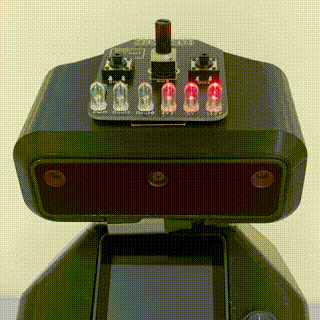

In [2]:
from IPython.display import Image
Image('gif/2_m5_4_demo1.gif')

PWM出力の制御には、 _set_pwmout()_ を使います。
```python
akari_client.m5stack_client.set_pwmout(self, pin_id: int, value: int, sync: bool = True) -> None:
"""ヘッド部GPIOピンのPWM出力を設定する。

Args:
    pin_id: pin番号。デフォルトではpwmout0しかないため、0を指定すること。
    value: PWM出力の値。 0-255で指定し、0で0V、255で3.3Vを出力する。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。
"""
```

下記にpwmout0を255にするサンプルを記載します。
テスト用ヘッドモジュールをAKARIに接続している場合は、pwmout0のLEDが点灯します。

In [ ]:
# pwmout0を255に
m5.set_pwmout(pin_id=0,value=255)

##### 動作例

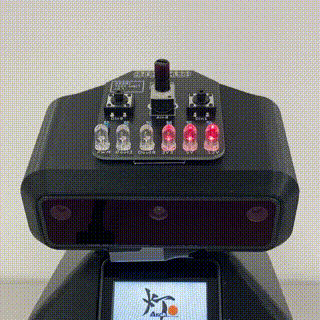

In [1]:
from IPython.display import Image
Image('gif/2_m5_4_demo2.gif')

また、 _set_allout()_ を使うことで、3ピン同時に制御することもできます。
```python
akari_client.m5stack_client.set_allout(
        self,
        *,
        dout0: bool,
        dout1: bool,
        pwmout0: int,
        sync: bool = True,
    ) -> None:
"""ヘッド部GPIOピンの出力をまとめて設定する。

Args:
    dout0: dout0の出力値。``False``で0V,``True``で3.3V出力。
    dout1: dout1の出力値。``False``で0V,``True``で3.3V出力。
    pwmout0: pwmout0の出力値。0-255で指定し、0で0V、255で3.3Vを出力する。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。

"""
```

下記にdout0をLo,dout1をHi,pwmout0を200にするサンプルを記載します。

In [ ]:
# dout0をLo,dout1をHi,pwmout0を200に
m5.set_allout(dout0=False,dout1=True,pwmout0=200)

##### 動作例

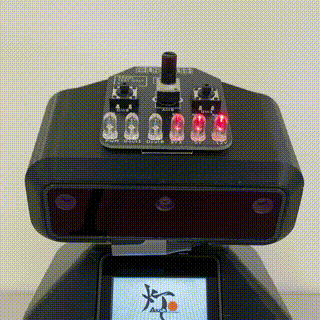

In [3]:
from IPython.display import Image
Image('gif/2_m5_4_demo3.gif')

### 練習問題3
dout0,dout1を1秒ずつ順番にHiにする処理を3回ずつ繰り返す処理を書いてみましょう。

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする処理を書く。

    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする処理を書く。

    # 1秒待つ
    time.sleep(1)

print("終わります。")

#### 答え

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする処理を書く。
    m5.set_dout(pin_id=0, value=True)
    m5.set_dout(pin_id=1, value=False)
    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする処理を書く。
    m5.set_dout(pin_id=0, value=False)
    m5.set_dout(pin_id=1, value=True)
    # 1秒待つ
    time.sleep(1)

print("終わります。")

##### 動作例

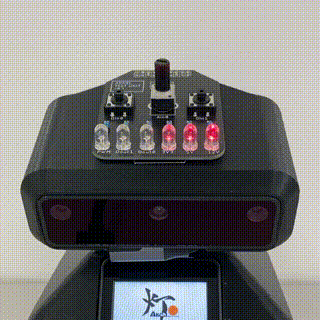

In [4]:
from IPython.display import Image
Image('gif/2_m5_4_rensyu3.gif')

## 5. GPIOピンの出力を確認しよう。
4.でセットしたGPIOピンの出力は _get()_ を使い取得することができます。 GPIOの出力を取得する場合に用いる要素は"dout0", "dout1", "pwmout0"です。
```python
"""
dout0: ヘッドのdout0ピンのデジタル出力。TrueでHi(3.3V)、FalseでLo(0V)。
dout1: ヘッドのdout1ピンのデジタル出力。TrueでHi(3.3V)、FalseでLo(0V)。
pwmout0: ヘッドのpwmout0ピンのPWM出力。0-255の256段階で0-3.3Vを出力可能。
"""
```

下記にdout0, dout1, pwmout0の状態を取得するサンプルを記述します。

In [ ]:
# M5から情報を取得し、dout0, dout1, pwmout0の状態をprintする。
data = m5.get()
print("dout0は" + str(data["dout0"]) + ", dout1は" + str(data["dout1"]) + ", pwmout0は" + str(data["pwmout0"]) + "です。") 

### 練習問題4
練習問題3に、dout0,dout1の現在値を取得し、printする処理を追加してみましょう。

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする。
    m5.set_dout(pin_id=0, value=True)
    m5.set_dout(pin_id=1, value=False)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    
    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする。
    m5.set_dout(pin_id=0, value=False)
    m5.set_dout(pin_id=1, value=True)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    
    # 1秒待つ
    time.sleep(1)

print("終わります。")

#### 答え

In [ ]:
import time
# 3回繰り返す処理
for i in range(0,3):
    # dout0をHi,dout1をLoにする。
    m5.set_dout(pin_id=0, value=True)
    m5.set_dout(pin_id=1, value=False)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    data = m5.get()
    print("dout0は" + str(data["dout0"]) + ", dout1は" + str(data["dout1"]) + "です。") 
    # 1秒待つ
    time.sleep(1)
    # dout0をLo,dout1をhiにする。
    m5.set_dout(pin_id=0, value=False)
    m5.set_dout(pin_id=1, value=True)
    # dout0,dout1の現在状態を取得し、printする処理を書く。
    data = m5.get()
    print("dout0は" + str(data["dout0"]) + ", dout1は" + str(data["dout1"]) + "です。")
    # 1秒待つ
    time.sleep(1)

print("終わります。")

## 6. 環境センサの計測値を確認しよう。
環境線センサの計測した温度、気圧、明るさも _get()_ を使い取得することができます。 温度は"temperature", 気圧は"pressure", 明るさは"brightness"の各要素から取得することができます。
```python
"""
temperature: AKARI側面の環境センサモジュールの温度計測値。単位は℃。  
pressure: AKARI側面の環境センサモジュールの観測絶対圧力。単位はPa。  
brightness: AKARI側面の光センサユニットの観測明るさを4096段階で出力。0が最も明るい。  
"""
```
下記に温度、気圧、明るさの状態を取得するサンプルを記述します。

In [ ]:
# M5から情報を取得し、dout0, dout1, pwmout0の状態をprintする。
data = m5.get()
print("温度は" + str(data["temperature"]) + "℃, 気圧は" + str(data["pressure"]) + "Pa, 明るさは" + str(data["brightness"]) + "です。") 

### 練習問題5
明るさが3500以上になったら"暗いです!"と表示してみましょう(明るさ値は暗いほど高くなります)。  
AKARIのボディー側面の光センサユニットを指で覆うと明るさの値が高くなります。

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # m5からセンサを取得する処理を書く
    
    # 明るさが3500以上だった場合"暗いです！"と表示する処理を、if文を用いて書く
    
    # 1秒待つ
    time.sleep(1)
print("終わります。")

#### 答え

In [ ]:
import time
# 10回繰り返す処理
for i in range(0,10):
    # m5からセンサを取得する処理を書く
    data = m5.get()
    # 明るさが3500以上だった場合"暗いです！"と表示する処理を、if文を用いて書く
    if(data["brightness"]>=3500):
        print("暗いです！")
    # 1秒待つ
    time.sleep(1)
print("終わります。")

## 最後に
以上でM5との通信のチュートリアルは終わりです。  
その他にもいくつかのAPIがあります。詳しくは[SDKリファレンス](https://akari-docs.vbcpp.net/source/sdk_reference/akari_client/joint.html#)を参照ください。  
次はM5のディスプレイ制御について説明します。